# 数据框出报表：数据科学之分进合击分析策略
![Data Science](https://www.kdnuggets.com/wp-content/uploads/data-science-process.jpg)


## 本周主要内容
1. 分进合击出报表
2. 合合合：合击出报表常用计算的设计安排
3. 进进进：进击出报表常用计算的选项
4. 分分分：从df.groupby开展对知识领域丶统计丶及数据管理的数据形态及标准
5. 数据感：从聚合到解聚的操作感

![06_groupby.svg](https://pandas.pydata.org/pandas-docs/version/1.0.2/_images/06_groupby.svg)

In [1]:
import pandas as pd

## 分进合击出报表
1. 分进合击之pandas剑法
  * 分 groupby
  * 迸 count, sum, mean, max, min
  * 合 agg
2. 分进合击之数据科学心法
  * 分 split
  * 迸 apply
  * 合 combine
3. 出报表剑法
  * 一EXCEL档多分页法: 
     * with pd.ExcelWriter() as writer:
     * with open() as fp:
  * rename改名法
     * 先练改columns名称(i.e. 变数名称)
     * (以后)再练改index名称(i.e. 观察名称)
  * sort_values 排序法
     * 高阶多索引排序以后细练 
     * 今日先比划比划先过
  


In [2]:
# A0 简单读档并查看数据框讯息
# 注意看Dtype! 
df = pd.read_csv ("20春_pandas_week02_hurun_unicorn.tsv", encoding = "utf8", sep="\t")
df.info()#取出header，来看看可以怎么来分类

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 10 columns):
排名              494 non-null int64
企业名称            494 non-null object
Company Name    494 non-null object
估值（亿人民币）        494 non-null int64
国家              494 non-null object
城市              494 non-null object
行业              494 non-null object
掌门人/创始人         494 non-null object
成立年份            494 non-null int64
部分投资机构          494 non-null object
dtypes: int64(3), object(7)
memory usage: 38.7+ KB


### 挑战A1：如法泡制
多来两页excel

* 先国再城
* 先行再城

In [3]:
# A1 原完整代码，这里是参考代码哈，来仔细观察观察
先国再行 = df.groupby ( by = ['国家','行业'] ) \
             .agg ({ "企业名称" : "count", \
                     "估值（亿人民币）":["sum","mean"], \
                     "成立年份":["max","min"],               }) \
             .sort_values ( by = [("估值（亿人民币）","sum")], ascending = False) \
             .rename ( columns = {"sum":"总和", "mean":"均值", "count":"数量", "max":"最新", "min":"最早"} )
先行再国 = df.groupby ( by = ['行业', '国家'] ) \
             .agg ({ "企业名称" : "count", \
                     "估值（亿人民币）":["sum","mean"], \
                     "成立年份":["max","min"],               }) \
             .sort_values ( by = [("估值（亿人民币）","sum")], ascending = False) \
             .rename ( columns = {"sum":"总和", "mean":"均值", "count":"数量", "max":"最新", "min":"最早"} )
display(先国再行)
display(先行再国)

with pd.ExcelWriter("20春_pandas_week03_hurun_unicorn.xlsx") as writer: #保存结果到已存在的excel文件中，并支持多个sheet表格写入excel。
    先国再行.to_excel(writer,sheet_name="先国再行")   # 保存为excel档，并且sheet_name是“先国在行”
    先行再国.to_excel(writer,sheet_name="先行再国") 

企业名称 估值（亿人民币）               成立年份      
               数量       总和           均值    最新    最早
国家   行业                                            
中国   金融科技      22    17960   816.363636  2018  2002
     媒体和娱乐     17     8230   484.117647  2015  2003
美国   云计算       32     6880   215.000000  2015  2000
     共享经济       6     5670   945.000000  2017  2008
     金融科技      21     5020   239.047619  2017  2000
中国   共享经济       8     4740   592.500000  2016  2011
     电子商务      33     4220   127.878788  2015  2005
美国   消费品        7     4060   580.000000  2017  2006
中国   物流        16     3910   244.375000  2015  2000
美国   人工智能      20     3080   154.000000  2016  2003
     航天         3     2770   923.333333  2012  2002
     生命科学      10     2660   266.000000  2016  2006
     电子商务      17     2640   155.294118  2017  2007
     物流         9     2310   256.666667  2015  2010
中国   人工智能      15     2090   139.333333  2016  2009
     健康科技      13     2060   158.461538  2019  2000
美国   大数据        8     1850   231.250000  2013  2001
中国   新能源汽车     12     1810   150.833333  2017  2014
美国   媒体和娱乐      6     1720   286.666667  2014  2003
     健康科技      12     1550   129.166667  2017  2001
中国   软件与服务     15     1460    97.333333  2014  2001
     机器人        3     1400   466.666667  2013  2006
     房地产科技      7     1340   191.428571  2018  2010
英国   金融科技       6     1250   208.333333  2015  2011
中国   区块链        4     1250   312.500000  2017  2013
     教育科技      11     1190   108.181818  2014  2001
美国   区块链        4     1170   292.500000  2013  2011
新加坡  共享经济       1     1000  1000.000000  2012  2012
美国   游戏         5      970   194.000000  2012  2004
印度   金融科技       3      920   306.666667  2010  2000
...           ...      ...          ...   ...   ...
以色列  软件与服务      1      150   150.000000  2002  2002
瑞士   区块链        1      150   150.000000  2015  2015
日本   人工智能       1      150   150.000000  2014  2014
印度   大数据        1      150   150.000000  2004  2004
爱尔兰  云计算        1      150   150.000000  2000  2000
瑞典   新能源        1      150   150.000000  2016  2016
中国   新能源        2      140    70.000000  2008  2006
巴西   物流         2      140    70.000000  2013  2011
中国   游戏         1      100   100.000000  2015  2015
以色列  人工智能       1       70    70.000000  2010  2010
印度   即时通讯       1       70    70.000000  2012  2012
阿根廷  云计算        1       70    70.000000  2013  2013
西班牙  共享经济       1       70    70.000000  2011  2011
菲律宾  房地产科技      1       70    70.000000  2015  2015
以色列  生命科学       1       70    70.000000  2010  2010
韩国   金融科技       1       70    70.000000  2011  2011
卢森堡  电子商务       1       70    70.000000  2014  2014
瑞士   虚拟与增强现实    1       70    70.000000  2012  2012
印度   新零售        1       70    70.000000  2011  2011
英国   新能源        1       70    70.000000  2009  2009
芬兰   消费品        1       70    70.000000  2016  2016
印度   游戏         1       70    70.000000  2012  2012
     软件与服务      1       70    70.000000  2007  2007
哥伦比亚 物流         1       70    70.000000  2016  2016
巴西   健康科技       1       70    70.000000  2012  2012
日本   区块链        1       70    70.000000  2014  2014
法国   人工智能       1       70    70.000000  2016  2016
     媒体和娱乐      1       70    70.000000  2006  2006
爱沙尼亚 共享经济       1       70    70.000000  2013  2013
法国   健康科技       1       70    70.000000  2013  2013

[103 rows x 5 columns]

企业名称 估值（亿人民币）               成立年份      
               数量       总和           均值    最新    最早
行业      国家                                         
金融科技    中国     22    17960   816.363636  2018  2002
媒体和娱乐   中国     17     8230   484.117647  2015  2003
云计算     美国     32     6880   215.000000  2015  2000
共享经济    美国      6     5670   945.000000  2017  2008
金融科技    美国     21     5020   239.047619  2017  2000
共享经济    中国      8     4740   592.500000  2016  2011
电子商务    中国     33     4220   127.878788  2015  2005
消费品     美国      7     4060   580.000000  2017  2006
物流      中国     16     3910   244.375000  2015  2000
人工智能    美国     20     3080   154.000000  2016  2003
航天      美国      3     2770   923.333333  2012  2002
生命科学    美国     10     2660   266.000000  2016  2006
电子商务    美国     17     2640   155.294118  2017  2007
物流      美国      9     2310   256.666667  2015  2010
人工智能    中国     15     2090   139.333333  2016  2009
健康科技    中国     13     2060   158.461538  2019  2000
大数据     美国      8     1850   231.250000  2013  2001
新能源汽车   中国     12     1810   150.833333  2017  2014
媒体和娱乐   美国      6     1720   286.666667  2014  2003
健康科技    美国     12     1550   129.166667  2017  2001
软件与服务   中国     15     1460    97.333333  2014  2001
机器人     中国      3     1400   466.666667  2013  2006
房地产科技   中国      7     1340   191.428571  2018  2010
金融科技    英国      6     1250   208.333333  2015  2011
区块链     中国      4     1250   312.500000  2017  2013
教育科技    中国     11     1190   108.181818  2014  2001
区块链     美国      4     1170   292.500000  2013  2011
共享经济    新加坡     1     1000  1000.000000  2012  2012
游戏      美国      5      970   194.000000  2012  2004
金融科技    印度      3      920   306.666667  2010  2000
...           ...      ...          ...   ...   ...
生命科学    德国      1      150   150.000000  2000  2000
大数据     印度      1      150   150.000000  2004  2004
软件与服务   以色列     1      150   150.000000  2002  2002
游戏      英国      1      150   150.000000  2012  2012
区块链     马耳他     1      150   150.000000  2017  2017
人工智能    日本      1      150   150.000000  2014  2014
新能源     中国      2      140    70.000000  2008  2006
物流      巴西      2      140    70.000000  2013  2011
游戏      中国      1      100   100.000000  2015  2015
软件与服务   印度      1       70    70.000000  2007  2007
人工智能    以色列     1       70    70.000000  2010  2010
云计算     阿根廷     1       70    70.000000  2013  2013
人工智能    法国      1       70    70.000000  2016  2016
虚拟与增强现实 瑞士      1       70    70.000000  2012  2012
新零售     印度      1       70    70.000000  2011  2011
电子商务    卢森堡     1       70    70.000000  2014  2014
健康科技    巴西      1       70    70.000000  2012  2012
        法国      1       70    70.000000  2013  2013
共享经济    爱沙尼亚    1       70    70.000000  2013  2013
        西班牙     1       70    70.000000  2011  2011
区块链     日本      1       70    70.000000  2014  2014
新能源     英国      1       70    70.000000  2009  2009
即时通讯    印度      1       70    70.000000  2012  2012
生命科学    以色列     1       70    70.000000  2010  2010
媒体和娱乐   法国      1       70    70.000000  2006  2006
房地产科技   菲律宾     1       70    70.000000  2015  2015
物流      哥伦比亚    1       70    70.000000  2016  2016
游戏      印度      1       70    70.000000  2012  2012
消费品     芬兰      1       70    70.000000  2016  2016
金融科技    韩国      1       70    70.000000  2011  2011

[103 rows x 5 columns]

In [5]:
# A1-Extra 完整代码，多来2页：先国再城，先行再城。

# 来练练吧
先国再城 = df.groupby ( by = ['国家','城市'] ) \
             .agg ({ "企业名称" : "count", \
                     "估值（亿人民币）":["sum","mean"], \
                     "成立年份":["max","min"],               }) \
             .sort_values ( by = [("估值（亿人民币）","sum")], ascending = False) \
             .rename ( columns = {"sum":"总和", "mean":"均值", "count":"数量", "max":"最新", "min":"最早"} )
先行再城 = df.groupby ( by = ['行业', '城市'] ) \
             .agg ({ "企业名称" : "count", \
                     "估值（亿人民币）":["sum","mean"], \
                     "成立年份":["max","min"],               }) \
             .sort_values ( by = [("估值（亿人民币）","sum")], ascending = False) \
             .rename ( columns = {"sum":"总和", "mean":"均值", "count":"数量", "max":"最新", "min":"最早"} )
display(先国再城)
display(先行再城)

with pd.ExcelWriter("20春_pandas_week03_hurun_unicorn.xlsx") as writer: #保存结果到已存在的excel文件中，并支持多个sheet表格写入excel。
    先国再行.to_excel(writer,sheet_name="先国再城")   # 保存为excel档，并且sheet_name是“先国在城”
    先行再国.to_excel(writer,sheet_name="先行再城") 

企业名称 估值（亿人民币）               成立年份      
                   数量       总和           均值    最新    最早
国家    城市                                               
中国    北京           81    22130   273.209877  2019  2001
美国    旧金山          55    17060   310.181818  2017  2004
中国    杭州           19    13290   699.473684  2015  2000
      上海           47     8990   191.276596  2017  2001
美国    纽约           25     8640   345.600000  2015  2002
中国    深圳           17     4440   261.176471  2018  2006
美国    洛杉矶           3     3570  1190.000000  2010  2002
      帕洛阿尔托        10     2740   274.000000  2016  2004
英国    伦敦            9     1700   188.888889  2015  2011
印度尼西亚 雅加达           4     1570   392.500000  2012  2009
中国    南京           11     1550   140.909091  2018  2006
印度    班加罗尔          9     1500   166.666667  2017  2004
新加坡   新加坡           2     1350   675.000000  2012  2012
美国    门洛帕克          3     1300   433.333333  2016  2013
印度    古尔冈           7     1160   165.714286  2014  2008
中国    天津            3     1100   366.666667  2018  2013
美国    圣地亚哥          4     1010   252.500000  2016  2008
韩国    首尔            5     1010   202.000000  2011  2005
中国    广州            8     1000   125.000000  2017  2011
印度    诺伊达           2      900   450.000000  2010  2010
美国    雷德伍德城         9      870    96.666667  2014  2000
      波士顿           8      820   102.500000  2013  2001
      山景城           6      660   110.000000  2015  2006
      圣马特奥          3      650   216.666667  2017  2004
德国    柏林            4      640   160.000000  2013  2009
美国    芝加哥           4      570   142.500000  2015  2012
巴西    圣保罗           4      510   127.500000  2013  2011
美国    匹兹堡           1      500   500.000000  2015  2015
      Harrisburg    1      500   500.000000  2016  2016
      Emerville     1      500   500.000000  2007  2007
...               ...      ...          ...   ...   ...
卢森堡   卢森堡           1       70    70.000000  2014  2014
中国    金华            1       70    70.000000  2017  2017
      桐乡            1       70    70.000000  2014  2014
      无锡            1       70    70.000000  2010  2010
菲律宾   马卡迪           1       70    70.000000  2015  2015
西班牙   马德里           1       70    70.000000  2011  2011
阿根廷   布宜诺斯艾利斯       1       70    70.000000  2013  2013
中国    台北            1       70    70.000000  2006  2006
美国    萨默维尔市         1       70    70.000000  2011  2011
印度    新德里           1       70    70.000000  2012  2012
美国    菲尼克斯          1       70    70.000000  2015  2015
      苗必达           1       70    70.000000  2007  2007
      哥伦布           1       70    70.000000  2015  2015
      坎贝尔           1       70    70.000000  2007  2007
      埃尔塞贡多         1       70    70.000000  2010  2010
      克利尔沃特         1       70    70.000000  2010  2010
      尔湾            1       70    70.000000  2013  2013
      Stafford      1       70    70.000000  2006  2006
      Guilford      1       70    70.000000  2011  2011
      底特律           1       70    70.000000  2015  2015
瑞士    洛桑市           1       70    70.000000  2012  2012
爱沙尼亚  塔林            1       70    70.000000  2013  2013
美国    普莱森顿          1       70    70.000000  2012  2012
      杭廷顿海滩         1       70    70.000000  2006  2006
德国    汉堡            1       70    70.000000  2014  2014
哥伦比亚  波哥大           1       70    70.000000  2016  2016
美国    盐湖城           1       70    70.000000  2008  2008
      罗利            1       70    70.000000  2011  2011
印度    孟买            1       70    70.000000  2012  2012
美国    半月湾           1       70    70.000000  2014  2014

[121 rows x 5 columns]

企业名称 估值（亿人民币）               成立年份      
                 数量       总和           均值    最新    最早
行业    城市                                             
金融科技  杭州          4    10290  2572.500000  2015  2009
媒体和娱乐 北京          7     6890   984.285714  2013  2003
共享经济  北京          5     4040   808.000000  2016  2011
云计算   纽约          4     3950   987.500000  2011  2002
消费品   旧金山         2     3550  1775.000000  2017  2015
金融科技  上海          4     3470   867.500000  2015  2002
      旧金山         8     3100   387.500000  2017  2007
共享经济  旧金山         2     2770  1385.000000  2009  2008
航天    洛杉矶         1     2500  2500.000000  2002  2002
电子商务  北京         13     2300   176.923077  2015  2006
共享经济  纽约          1     2100  2100.000000  2010  2010
金融科技  北京          8     1920   240.000000  2018  2006
物流    旧金山         5     1870   374.000000  2013  2011
云计算   旧金山        14     1660   118.571429  2015  2005
金融科技  深圳          3     1640   546.666667  2016  2014
人工智能  北京          9     1430   158.888889  2016  2009
机器人   深圳          2     1300   650.000000  2012  2006
物流    杭州          1     1300  1300.000000  2013  2013
金融科技  伦敦          6     1250   208.333333  2015  2011
电子商务  旧金山         5     1110   222.000000  2017  2008
物流    北京          4     1040   260.000000  2014  2007
共享经济  新加坡         1     1000  1000.000000  2012  2012
媒体和娱乐 洛杉矶         1     1000  1000.000000  2007  2007
大数据   帕洛阿尔托       1     1000  1000.000000  2004  2004
区块链   旧金山         3      970   323.333333  2012  2011
健康科技  上海          3      970   323.333333  2016  2008
生命科学  圣地亚哥        2      870   435.000000  2013  2008
电子商务  雅加达         3      870   290.000000  2012  2009
区块链   北京          1      800   800.000000  2013  2013
电子商务  上海          8      780    97.500000  2015  2005
...             ...      ...          ...   ...   ...
大数据   罗利          1       70    70.000000  2011  2011
媒体和娱乐 华盛顿         1       70    70.000000  2003  2003
游戏    波士顿         1       70    70.000000  2012  2012
共享经济  马德里         1       70    70.000000  2011  2011
生命科学  波士顿         1       70    70.000000  2009  2009
电子商务  贝尔维尤        1       70    70.000000  2011  2011
健康科技  巴黎          1       70    70.000000  2013  2013
新零售   旧金山         1       70    70.000000  2015  2015
      班加罗尔        1       70    70.000000  2011  2011
游戏    孟买          1       70    70.000000  2012  2012
电子商务  洛杉矶         1       70    70.000000  2010  2010
      波士顿         1       70    70.000000  2007  2007
      汉堡          1       70    70.000000  2014  2014
人工智能  雷德伍德城       1       70    70.000000  2009  2009
健康科技  Guilford    1       70    70.000000  2011  2011
      圣保罗         1       70    70.000000  2012  2012
      尔湾          1       70    70.000000  2013  2013
电子商务  底特律         1       70    70.000000  2015  2015
生命科学  特拉维夫        1       70    70.000000  2010  2010
健康科技  广州          1       70    70.000000  2015  2015
电子商务  埃尔塞贡多       1       70    70.000000  2010  2010
      圣塔莫尼卡       1       70    70.000000  2016  2016
      古尔冈         1       70    70.000000  2011  2011
      卢森堡         1       70    70.000000  2014  2014
房地产科技 马卡迪         1       70    70.000000  2015  2015
      迈阿密         1       70    70.000000  2013  2013
新能源   坎贝尔         1       70    70.000000  2007  2007
房地产科技 纽约          1       70    70.000000  2012  2012
共享经济  塔林          1       70    70.000000  2013  2013
新能源   布里斯托尔       1       70    70.000000  2009  2009

[298 rows x 5 columns]

### 挑战A2：倒敍rename
来看看有rename 与无rename 有什么差别吧

原来是 df ----->  先国再行

现在是 df ----->  先国再行_中继  ---.rename()-->  先国再行

In [21]:
#首先来看看先国再行_中继
先国再行_中继 = df.groupby ( by = ['国家','行业'] ) \
             .agg ({ "企业名称" : "count", \
                     "估值（亿人民币）":["sum","mean"], \
                     "成立年份":["max","min"],               }) \
             .sort_values ( by = [("估值（亿人民币）","sum")], ascending = False) 

display(先国再行_中继)

with pd.ExcelWriter("20春_pandas_week03_hurun_unicorn.xlsx") as writer: #保存结果到已存在的excel文件中，并支持多个sheet表格写入excel。
    先国再行_中继.to_excel(writer,sheet_name="先国再行_中继")   # 保存为excel档，并且sheet_name是“先国再行_中继”

企业名称 估值（亿人民币）               成立年份      
             count      sum         mean   max   min
国家   行业                                             
中国   金融科技       22    17960   816.363636  2018  2002
     媒体和娱乐      17     8230   484.117647  2015  2003
美国   云计算        32     6880   215.000000  2015  2000
     共享经济        6     5670   945.000000  2017  2008
     金融科技       21     5020   239.047619  2017  2000
中国   共享经济        8     4740   592.500000  2016  2011
     电子商务       33     4220   127.878788  2015  2005
美国   消费品         7     4060   580.000000  2017  2006
中国   物流         16     3910   244.375000  2015  2000
美国   人工智能       20     3080   154.000000  2016  2003
     航天          3     2770   923.333333  2012  2002
     生命科学       10     2660   266.000000  2016  2006
     电子商务       17     2640   155.294118  2017  2007
     物流          9     2310   256.666667  2015  2010
中国   人工智能       15     2090   139.333333  2016  2009
     健康科技       13     2060   158.461538  2019  2000
美国   大数据         8     1850   231.250000  2013  2001
中国   新能源汽车      12     1810   150.833333  2017  2014
美国   媒体和娱乐       6     1720   286.666667  2014  2003
     健康科技       12     1550   129.166667  2017  2001
中国   软件与服务      15     1460    97.333333  2014  2001
     机器人         3     1400   466.666667  2013  2006
     房地产科技       7     1340   191.428571  2018  2010
英国   金融科技        6     1250   208.333333  2015  2011
中国   区块链         4     1250   312.500000  2017  2013
     教育科技       11     1190   108.181818  2014  2001
美国   区块链         4     1170   292.500000  2013  2011
新加坡  共享经济        1     1000  1000.000000  2012  2012
美国   游戏          5      970   194.000000  2012  2004
印度   金融科技        3      920   306.666667  2010  2000
...            ...      ...          ...   ...   ...
以色列  软件与服务       1      150   150.000000  2002  2002
瑞士   区块链         1      150   150.000000  2015  2015
日本   人工智能        1      150   150.000000  2014  2014
印度   大数据         1      150   150.000000  2004  2004
爱尔兰  云计算         1      150   150.000000  2000  2000
瑞典   新能源         1      150   150.000000  2016  2016
中国   新能源         2      140    70.000000  2008  2006
巴西   物流          2      140    70.000000  2013  2011
中国   游戏          1      100   100.000000  2015  2015
以色列  人工智能        1       70    70.000000  2010  2010
印度   即时通讯        1       70    70.000000  2012  2012
阿根廷  云计算         1       70    70.000000  2013  2013
西班牙  共享经济        1       70    70.000000  2011  2011
菲律宾  房地产科技       1       70    70.000000  2015  2015
以色列  生命科学        1       70    70.000000  2010  2010
韩国   金融科技        1       70    70.000000  2011  2011
卢森堡  电子商务        1       70    70.000000  2014  2014
瑞士   虚拟与增强现实     1       70    70.000000  2012  2012
印度   新零售         1       70    70.000000  2011  2011
英国   新能源         1       70    70.000000  2009  2009
芬兰   消费品         1       70    70.000000  2016  2016
印度   游戏          1       70    70.000000  2012  2012
     软件与服务       1       70    70.000000  2007  2007
哥伦比亚 物流          1       70    70.000000  2016  2016
巴西   健康科技        1       70    70.000000  2012  2012
日本   区块链         1       70    70.000000  2014  2014
法国   人工智能        1       70    70.000000  2016  2016
     媒体和娱乐       1       70    70.000000  2006  2006
爱沙尼亚 共享经济        1       70    70.000000  2013  2013
法国   健康科技        1       70    70.000000  2013  2013

[103 rows x 5 columns]

In [10]:
#再来来看看先国再行
先国再行 = df.groupby ( by = ['国家','行业'] ) \
             .agg ({ "企业名称" : "count", \
                     "估值（亿人民币）":["sum","mean"], \
                     "成立年份":["max","min"],               }) \
             .sort_values ( by = [("估值（亿人民币）","sum")], ascending = False) \
            .rename ( columns = {"sum":"总和", "mean":"均值", "count":"数量", "max":"最新", "min":"最早"} )
            
display(先国再行)

with pd.ExcelWriter("20春_pandas_week03_hurun_unicorn.xlsx") as writer: #保存结果到已存在的excel文件中，并支持多个sheet表格写入excel。
    先国再行.to_excel(writer,sheet_name="先国再行")   # 保存为excel档，并且sheet_name是“先国再行”

企业名称 估值（亿人民币）               成立年份      
               数量       总和           均值    最新    最早
国家   行业                                            
中国   金融科技      22    17960   816.363636  2018  2002
     媒体和娱乐     17     8230   484.117647  2015  2003
美国   云计算       32     6880   215.000000  2015  2000
     共享经济       6     5670   945.000000  2017  2008
     金融科技      21     5020   239.047619  2017  2000
中国   共享经济       8     4740   592.500000  2016  2011
     电子商务      33     4220   127.878788  2015  2005
美国   消费品        7     4060   580.000000  2017  2006
中国   物流        16     3910   244.375000  2015  2000
美国   人工智能      20     3080   154.000000  2016  2003
     航天         3     2770   923.333333  2012  2002
     生命科学      10     2660   266.000000  2016  2006
     电子商务      17     2640   155.294118  2017  2007
     物流         9     2310   256.666667  2015  2010
中国   人工智能      15     2090   139.333333  2016  2009
     健康科技      13     2060   158.461538  2019  2000
美国   大数据        8     1850   231.250000  2013  2001
中国   新能源汽车     12     1810   150.833333  2017  2014
美国   媒体和娱乐      6     1720   286.666667  2014  2003
     健康科技      12     1550   129.166667  2017  2001
中国   软件与服务     15     1460    97.333333  2014  2001
     机器人        3     1400   466.666667  2013  2006
     房地产科技      7     1340   191.428571  2018  2010
英国   金融科技       6     1250   208.333333  2015  2011
中国   区块链        4     1250   312.500000  2017  2013
     教育科技      11     1190   108.181818  2014  2001
美国   区块链        4     1170   292.500000  2013  2011
新加坡  共享经济       1     1000  1000.000000  2012  2012
美国   游戏         5      970   194.000000  2012  2004
印度   金融科技       3      920   306.666667  2010  2000
...           ...      ...          ...   ...   ...
以色列  软件与服务      1      150   150.000000  2002  2002
瑞士   区块链        1      150   150.000000  2015  2015
日本   人工智能       1      150   150.000000  2014  2014
印度   大数据        1      150   150.000000  2004  2004
爱尔兰  云计算        1      150   150.000000  2000  2000
瑞典   新能源        1      150   150.000000  2016  2016
中国   新能源        2      140    70.000000  2008  2006
巴西   物流         2      140    70.000000  2013  2011
中国   游戏         1      100   100.000000  2015  2015
以色列  人工智能       1       70    70.000000  2010  2010
印度   即时通讯       1       70    70.000000  2012  2012
阿根廷  云计算        1       70    70.000000  2013  2013
西班牙  共享经济       1       70    70.000000  2011  2011
菲律宾  房地产科技      1       70    70.000000  2015  2015
以色列  生命科学       1       70    70.000000  2010  2010
韩国   金融科技       1       70    70.000000  2011  2011
卢森堡  电子商务       1       70    70.000000  2014  2014
瑞士   虚拟与增强现实    1       70    70.000000  2012  2012
印度   新零售        1       70    70.000000  2011  2011
英国   新能源        1       70    70.000000  2009  2009
芬兰   消费品        1       70    70.000000  2016  2016
印度   游戏         1       70    70.000000  2012  2012
     软件与服务      1       70    70.000000  2007  2007
哥伦比亚 物流         1       70    70.000000  2016  2016
巴西   健康科技       1       70    70.000000  2012  2012
日本   区块链        1       70    70.000000  2014  2014
法国   人工智能       1       70    70.000000  2016  2016
     媒体和娱乐      1       70    70.000000  2006  2006
爱沙尼亚 共享经济       1       70    70.000000  2013  2013
法国   健康科技       1       70    70.000000  2013  2013

[103 rows x 5 columns]

### A2 rename总结
这里就会发现原来 rename的作用是 重命名
```
.rename ( columns = {"sum":"总和", "mean":"均值", "count":"数量", "max":"最新", "min":"最早"} )
```
这里的为将columns列的名称，把sum改为总和，将mean改为均值，将count改为数量，将max改为最新，将min改为最早。
* .rename ( xyz = {"xxx":"xxx1", "yyy":"yyy1} )

### 挑战A3：倒敍sort_values
有sort_values 和 没sort_values的不同，以"先国再行"的结果为例

原来是 df ----->  先国再行

现在是 df ----->  先国再行_中继A  ---.有sort_values()-->   先国再行_中继B  ---.rename()-->  先国再行

请跑出 "先国再行_中继A" ，和 "先国再行_中继B" 用肉眼比较后，向实习生说明sort_values对於出报表的重要角色。

In [17]:
## 首先来看看 有.sort_values()
先国再行_中继A = df.groupby ( by = ['国家','行业'] ) \
             .agg ({ "企业名称" : "count", \
                     "估值（亿人民币）":["sum","mean"], \
                     "成立年份":["max","min"],               }) \
             .sort_values ( by = [("估值（亿人民币）","sum")], ascending = False) \
            .rename ( columns = {"sum":"总和", "mean":"均值", "count":"数量", "max":"最新", "min":"最早"} )
            
display(先国再行_中继A)

with pd.ExcelWriter("20春_pandas_week03_hurun_unicorn.xlsx") as writer: #保存结果到已存在的excel文件中，并支持多个sheet表格写入excel。
    先国再行.to_excel(writer,sheet_name="先国再行_中继A")   # 保存为excel档，并且sheet_name是“先国再行_中继A”

企业名称 估值（亿人民币）               成立年份      
               数量       总和           均值    最新    最早
国家   行业                                            
中国   金融科技      22    17960   816.363636  2018  2002
     媒体和娱乐     17     8230   484.117647  2015  2003
美国   云计算       32     6880   215.000000  2015  2000
     共享经济       6     5670   945.000000  2017  2008
     金融科技      21     5020   239.047619  2017  2000
中国   共享经济       8     4740   592.500000  2016  2011
     电子商务      33     4220   127.878788  2015  2005
美国   消费品        7     4060   580.000000  2017  2006
中国   物流        16     3910   244.375000  2015  2000
美国   人工智能      20     3080   154.000000  2016  2003
     航天         3     2770   923.333333  2012  2002
     生命科学      10     2660   266.000000  2016  2006
     电子商务      17     2640   155.294118  2017  2007
     物流         9     2310   256.666667  2015  2010
中国   人工智能      15     2090   139.333333  2016  2009
     健康科技      13     2060   158.461538  2019  2000
美国   大数据        8     1850   231.250000  2013  2001
中国   新能源汽车     12     1810   150.833333  2017  2014
美国   媒体和娱乐      6     1720   286.666667  2014  2003
     健康科技      12     1550   129.166667  2017  2001
中国   软件与服务     15     1460    97.333333  2014  2001
     机器人        3     1400   466.666667  2013  2006
     房地产科技      7     1340   191.428571  2018  2010
英国   金融科技       6     1250   208.333333  2015  2011
中国   区块链        4     1250   312.500000  2017  2013
     教育科技      11     1190   108.181818  2014  2001
美国   区块链        4     1170   292.500000  2013  2011
新加坡  共享经济       1     1000  1000.000000  2012  2012
美国   游戏         5      970   194.000000  2012  2004
印度   金融科技       3      920   306.666667  2010  2000
...           ...      ...          ...   ...   ...
以色列  软件与服务      1      150   150.000000  2002  2002
瑞士   区块链        1      150   150.000000  2015  2015
日本   人工智能       1      150   150.000000  2014  2014
印度   大数据        1      150   150.000000  2004  2004
爱尔兰  云计算        1      150   150.000000  2000  2000
瑞典   新能源        1      150   150.000000  2016  2016
中国   新能源        2      140    70.000000  2008  2006
巴西   物流         2      140    70.000000  2013  2011
中国   游戏         1      100   100.000000  2015  2015
以色列  人工智能       1       70    70.000000  2010  2010
印度   即时通讯       1       70    70.000000  2012  2012
阿根廷  云计算        1       70    70.000000  2013  2013
西班牙  共享经济       1       70    70.000000  2011  2011
菲律宾  房地产科技      1       70    70.000000  2015  2015
以色列  生命科学       1       70    70.000000  2010  2010
韩国   金融科技       1       70    70.000000  2011  2011
卢森堡  电子商务       1       70    70.000000  2014  2014
瑞士   虚拟与增强现实    1       70    70.000000  2012  2012
印度   新零售        1       70    70.000000  2011  2011
英国   新能源        1       70    70.000000  2009  2009
芬兰   消费品        1       70    70.000000  2016  2016
印度   游戏         1       70    70.000000  2012  2012
     软件与服务      1       70    70.000000  2007  2007
哥伦比亚 物流         1       70    70.000000  2016  2016
巴西   健康科技       1       70    70.000000  2012  2012
日本   区块链        1       70    70.000000  2014  2014
法国   人工智能       1       70    70.000000  2016  2016
     媒体和娱乐      1       70    70.000000  2006  2006
爱沙尼亚 共享经济       1       70    70.000000  2013  2013
法国   健康科技       1       70    70.000000  2013  2013

[103 rows x 5 columns]

In [15]:
## 再来看看 没有.sort_values()
先国再行_中继B = df.groupby ( by = ['国家','行业'] ) \
             .agg ({ "企业名称" : "count", \
                     "估值（亿人民币）":["sum","mean"], \
                     "成立年份":["max","min"],               }) \
            .rename ( columns = {"sum":"总和", "mean":"均值", "count":"数量", "max":"最新", "min":"最早"} )
            
display(先国再行_中继B)

with pd.ExcelWriter("20春_pandas_week03_hurun_unicorn.xlsx") as writer: #保存结果到已存在的excel文件中，并支持多个sheet表格写入excel。
    先国再行_中继B.to_excel(writer,sheet_name="先国再行_中继B")   # 保存为excel档，并且sheet_name是“先国再行_中继A”

企业名称 估值（亿人民币）              成立年份      
              数量       总和          均值    最新    最早
国家  行业                                           
中国  云计算        5      460   92.000000  2015  2011
    人工智能      15     2090  139.333333  2016  2009
    健康科技      13     2060  158.461538  2019  2000
    共享经济       8     4740  592.500000  2016  2011
    区块链        4     1250  312.500000  2017  2013
    大数据        9      720   80.000000  2015  2004
    媒体和娱乐     17     8230  484.117647  2015  2003
    房地产科技      7     1340  191.428571  2018  2010
    教育科技      11     1190  108.181818  2014  2001
    新能源        2      140   70.000000  2008  2006
    新能源汽车     12     1810  150.833333  2017  2014
    新零售        4      360   90.000000  2018  2006
    机器人        3     1400  466.666667  2013  2006
    消费品        4      620  155.000000  2018  2012
    游戏         1      100  100.000000  2015  2015
    物流        16     3910  244.375000  2015  2000
    生命科学       4      440  110.000000  2015  2007
    电子商务      33     4220  127.878788  2015  2005
    网络安全       1      200  200.000000  2015  2015
    软件与服务     15     1460   97.333333  2014  2001
    金融科技      22    17960  816.363636  2018  2002
以色列 云计算        4      440  110.000000  2013  2010
    人工智能       1       70   70.000000  2010  2010
    生命科学       1       70   70.000000  2010  2010
    软件与服务      1      150  150.000000  2002  2002
卢森堡 电子商务       1       70   70.000000  2014  2014
印度  共享经济       3      820  273.333333  2017  2010
    即时通讯       1       70   70.000000  2012  2012
    大数据        1      150  150.000000  2004  2004
    教育科技       1      400  400.000000  2008  2008
...          ...      ...         ...   ...   ...
美国  新能源        5      350   70.000000  2011  2006
    新能源汽车      3      720  240.000000  2015  2009
    新零售        6      500   83.333333  2015  2002
    机器人        1      200  200.000000  2016  2016
    消费品        7     4060  580.000000  2017  2006
    游戏         5      970  194.000000  2012  2004
    物流         9     2310  256.666667  2015  2010
    生命科学      10     2660  266.000000  2016  2006
    电子商务      17     2640  155.294118  2017  2007
    网络安全       6      850  141.666667  2019  2007
    航天         3     2770  923.333333  2012  2002
    虚拟与增强现实    2      700  350.000000  2011  2010
    软件与服务      4      360   90.000000  2014  2007
    金融科技      21     5020  239.047619  2017  2000
芬兰  消费品        1       70   70.000000  2016  2016
英国  人工智能       2      300  150.000000  2016  2013
    新能源        1       70   70.000000  2009  2009
    游戏         1      150  150.000000  2012  2012
    物流         1      150  150.000000  2012  2012
    生命科学       1      150  150.000000  2005  2005
    电子商务       1      350  350.000000  2004  2004
    金融科技       6     1250  208.333333  2015  2011
菲律宾 房地产科技      1       70   70.000000  2015  2015
西班牙 共享经济       1       70   70.000000  2011  2011
阿根廷 云计算        1       70   70.000000  2013  2013
韩国  游戏         1      350  350.000000  2007  2007
    物流         1      200  200.000000  2011  2011
    电子商务       3      740  246.666667  2010  2005
    金融科技       1       70   70.000000  2011  2011
马耳他 区块链        1      150  150.000000  2017  2017

[103 rows x 5 columns]

### A3 .sort_values总结
上下对比可以看出，.sort_values的作用是 排序，根据某一个标准进行排序。
```
 .sort_values ( by = [("估值（亿人民币）","sum")], ascending = False) \
 ```
 这行代码就是以"估值（亿人民币）","sum"作为排序依据，进行排序。
  .sort_values ( by = [(xxx)], ascending = False) 

### 挑战A4：agg 参数 的报表顺序
老板说，上次的EXCEL表，客服说要调整一下顺序，比较专业。

请你在已有的代码基础上，直接改agg 参数 来调整报表顺序。

原来顺序是：
* (    '企业名称', '数量')
* ('估值（亿人民币）', '总和')
* ('估值（亿人民币）', '均值')
* (    '成立年份', '最新')
* (    '成立年份', '最早')

请改顺序为：
* (    '成立年份', '最早')
* (    '成立年份', '最新')
* (    '企业名称', '数量')
* ('估值（亿人民币）', '均值')
* ('估值（亿人民币）', '总和')


In [19]:
## 换个顺序吧
先国再行_agg = df.groupby ( by = ['国家','行业'] ) \
             .agg ({ 
                    "成立年份":["max","min"], \
                    "企业名称" : "count", \
                     "估值（亿人民币）":["sum","mean"], }) \
             .sort_values ( by = [("估值（亿人民币）","sum")], ascending = False) \
            .rename ( columns = {"sum":"总和", "mean":"均值", "count":"数量", "max":"最新", "min":"最早"} )
            
display(先国再行_agg)

with pd.ExcelWriter("20春_pandas_week03_hurun_unicorn.xlsx") as writer: #保存结果到已存在的excel文件中，并支持多个sheet表格写入excel。
    先国再行_agg.to_excel(writer,sheet_name="先国再行_agg")   # 保存为excel档，并且sheet_name是“先国再行”

成立年份       企业名称 估值（亿人民币）             
                最新    最早   数量       总和           均值
国家   行业                                            
中国   金融科技     2018  2002   22    17960   816.363636
     媒体和娱乐    2015  2003   17     8230   484.117647
美国   云计算      2015  2000   32     6880   215.000000
     共享经济     2017  2008    6     5670   945.000000
     金融科技     2017  2000   21     5020   239.047619
中国   共享经济     2016  2011    8     4740   592.500000
     电子商务     2015  2005   33     4220   127.878788
美国   消费品      2017  2006    7     4060   580.000000
中国   物流       2015  2000   16     3910   244.375000
美国   人工智能     2016  2003   20     3080   154.000000
     航天       2012  2002    3     2770   923.333333
     生命科学     2016  2006   10     2660   266.000000
     电子商务     2017  2007   17     2640   155.294118
     物流       2015  2010    9     2310   256.666667
中国   人工智能     2016  2009   15     2090   139.333333
     健康科技     2019  2000   13     2060   158.461538
美国   大数据      2013  2001    8     1850   231.250000
中国   新能源汽车    2017  2014   12     1810   150.833333
美国   媒体和娱乐    2014  2003    6     1720   286.666667
     健康科技     2017  2001   12     1550   129.166667
中国   软件与服务    2014  2001   15     1460    97.333333
     机器人      2013  2006    3     1400   466.666667
     房地产科技    2018  2010    7     1340   191.428571
英国   金融科技     2015  2011    6     1250   208.333333
中国   区块链      2017  2013    4     1250   312.500000
     教育科技     2014  2001   11     1190   108.181818
美国   区块链      2013  2011    4     1170   292.500000
新加坡  共享经济     2012  2012    1     1000  1000.000000
美国   游戏       2012  2004    5      970   194.000000
印度   金融科技     2010  2000    3      920   306.666667
...            ...   ...  ...      ...          ...
以色列  软件与服务    2002  2002    1      150   150.000000
瑞士   区块链      2015  2015    1      150   150.000000
日本   人工智能     2014  2014    1      150   150.000000
印度   大数据      2004  2004    1      150   150.000000
爱尔兰  云计算      2000  2000    1      150   150.000000
瑞典   新能源      2016  2016    1      150   150.000000
中国   新能源      2008  2006    2      140    70.000000
巴西   物流       2013  2011    2      140    70.000000
中国   游戏       2015  2015    1      100   100.000000
以色列  人工智能     2010  2010    1       70    70.000000
印度   即时通讯     2012  2012    1       70    70.000000
阿根廷  云计算      2013  2013    1       70    70.000000
西班牙  共享经济     2011  2011    1       70    70.000000
菲律宾  房地产科技    2015  2015    1       70    70.000000
以色列  生命科学     2010  2010    1       70    70.000000
韩国   金融科技     2011  2011    1       70    70.000000
卢森堡  电子商务     2014  2014    1       70    70.000000
瑞士   虚拟与增强现实  2012  2012    1       70    70.000000
印度   新零售      2011  2011    1       70    70.000000
英国   新能源      2009  2009    1       70    70.000000
芬兰   消费品      2016  2016    1       70    70.000000
印度   游戏       2012  2012    1       70    70.000000
     软件与服务    2007  2007    1       70    70.000000
哥伦比亚 物流       2016  2016    1       70    70.000000
巴西   健康科技     2012  2012    1       70    70.000000
日本   区块链      2014  2014    1       70    70.000000
法国   人工智能     2016  2016    1       70    70.000000
     媒体和娱乐    2006  2006    1       70    70.000000
爱沙尼亚 共享经济     2013  2013    1       70    70.000000
法国   健康科技     2013  2013    1       70    70.000000

[103 rows x 5 columns]

### 小结
* 总结一下出报表3剑法
  * 一EXCEL档多分页法: 
      * with pd.ExcelWriter() as writer:  保存结果到已存在的excel文件中，并支持多个sheet表格写入excel
      * with open() as fp:   打开文件并且会自动关闭
  * rename改名法
      * 重命名
      * .rename ( xyz = {"xxx":"xxx1", "yyy":"yyy1} )
  * sort_values 排序法
     * 可以根据索引来排序
     * .sort_values ( by = [(xxx)], ascending = False) 
* 你能总结一下所有参数的各别意义吗？
  * groupby 分组
  * agg 把一些“对象”给组合在一起
  * 迸 count, sum, mean, max, min 统计
* 你能总结描述一下整个流程吗？
  * 首先要分组
  * 其次要把你所需要的值给组合在一起
  * 再把你所需的值进行统计
  
#### 小坑/小风格
* 代码某几行最后一个字符有 \，指的是什麽意思？
 * 表示这行尚未结束
* 代码某几行最后一个字符有 \，为什麽要用？给机器还是人用的？
 * 给人看的，这提醒人 这个代码还没有写完
* 代码某几行最后一个字符有 \，若后面多了空白会怎麽样？
 * 会报错


## 分分分

> <mark>分分分</mark>，接续上周的**切切切**切片 (英文叫slice)，groupby的分分分，是数据科学家将**切切切**的数据解剖刀，在找突破点的后，系统地把全数据拆分多块。<mark>大卸八块</mark>后好分迸合击。要如何分，不只是要会df.groupby的参数始使用，更是开展对知识领域丶统计丶及数据管理的数据形态及标准的数据感修练之旅

-----

In [23]:
# 来观察一下有什么表头有些什么变量吧
df.head()

,排名,企业名称,Company Name,估值（亿人民币）,国家,城市,行业,掌门人/创始人,成立年份,部分投资机构
0,1,蚂蚁金服,Ant Financial,10000,中国,杭州,金融科技,井贤栋,2014,春华资本、中投海外、红杉资本
1,2,字节跳动,Bytedance,5000,中国,北京,媒体和娱乐,张一鸣,2012,红杉资本、海纳亚洲、纪源资本、启明创投
2,3,滴滴出行,Didi Chuxing,3600,中国,北京,共享经济,程维,2012,腾讯、阿里巴巴、红杉资本、经纬中国、纪源资本
3,4,Infor,Infor,3500,美国,纽约,云计算,Jim Schaper,2002,"Golden Gate Capital, Koch Equity Development"
4,5,JUUL Labs,JUUL Labs,3400,美国,旧金山,消费品,"Adam Bowen, James Monsees, Kevin Burns, Tim Da...",2015,"M13, Timothy Davis, Evolution VC Partners, Tig..."


In [24]:
# 传递给的字符串groupby可以引用列级别或索引级别
df_grouped_01 = df.groupby("国家")
# 来看看以国家作为索引吧
df_grouped_01.dtypes

,排名,企业名称,Company Name,估值（亿人民币）,城市,行业,掌门人/创始人,成立年份,部分投资机构
国家,,,,,,,,,
中国,int64,object,object,int64,object,object,object,int64,object
以色列,int64,object,object,int64,object,object,object,int64,object
卢森堡,int64,object,object,int64,object,object,object,int64,object
印度,int64,object,object,int64,object,object,object,int64,object
印度尼西亚,int64,object,object,int64,object,object,object,int64,object
哥伦比亚,int64,object,object,int64,object,object,object,int64,object
巴西,int64,object,object,int64,object,object,object,int64,object
德国,int64,object,object,int64,object,object,object,int64,object
新加坡,int64,object,object,int64,object,object,object,int64,object


In [29]:
# 再来看看以行业作为索引吧
df_grouped_02 = df.groupby("行业")

df_grouped_02.dtypes

,排名,企业名称,Company Name,估值（亿人民币）,国家,城市,掌门人/创始人,成立年份,部分投资机构
行业,,,,,,,,,
3D印刷,int64,object,object,int64,object,object,object,int64,object
云计算,int64,object,object,int64,object,object,object,int64,object
人工智能,int64,object,object,int64,object,object,object,int64,object
健康科技,int64,object,object,int64,object,object,object,int64,object
共享经济,int64,object,object,int64,object,object,object,int64,object
区块链,int64,object,object,int64,object,object,object,int64,object
即时通讯,int64,object,object,int64,object,object,object,int64,object
大数据,int64,object,object,int64,object,object,object,int64,object
媒体和娱乐,int64,object,object,int64,object,object,object,int64,object


In [34]:
# 再多个index
df_grouped_03 = df.groupby(["国家","行业"])
df_grouped_03.dtypes

排名    企业名称 Company Name 估值（亿人民币）      城市 掌门人/创始人   成立年份  \
国家  行业                                                                    
中国  云计算      int64  object       object    int64  object  object  int64   
    人工智能     int64  object       object    int64  object  object  int64   
    健康科技     int64  object       object    int64  object  object  int64   
    共享经济     int64  object       object    int64  object  object  int64   
    区块链      int64  object       object    int64  object  object  int64   
    大数据      int64  object       object    int64  object  object  int64   
    媒体和娱乐    int64  object       object    int64  object  object  int64   
    房地产科技    int64  object       object    int64  object  object  int64   
    教育科技     int64  object       object    int64  object  object  int64   
    新能源      int64  object       object    int64  object  object  int64   
    新能源汽车    int64  object       object    int64  object  object  int64   
    新零售      int64  object       object    int64  object  object  int64   
    机器人      int64  object       object    int64  object  object  int64   
    消费品      int64  object       object    int64  object  object  int64   
    游戏       int64  object       object    int64  object  object  int64   
    物流       int64  object       object    int64  object  object  int64   
    生命科学     int64  object       object    int64  object  object  int64   
    电子商务     int64  object       object    int64  object  object  int64   
    网络安全     int64  object       object    int64  object  object  int64   
    软件与服务    int64  object       object    int64  object  object  int64   
    金融科技     int64  object       object    int64  object  object  int64   
以色列 云计算      int64  object       object    int64  object  object  int64   
    人工智能     int64  object       object    int64  object  object  int64   
    生命科学     int64  object       object    int64  object  object  int64   
    软件与服务    int64  object       object    int64  object  object  int64   
卢森堡 电子商务     int64  object       object    int64  object  object  int64   
印度  共享经济     int64  object       object    int64  object  object  int64   
    即时通讯     int64  object       object    int64  object  object  int64   
    大数据      int64  object       object    int64  object  object  int64   
    教育科技     int64  object       object    int64  object  object  int64   
...            ...     ...          ...      ...     ...     ...    ...   
美国  新能源      int64  object       object    int64  object  object  int64   
    新能源汽车    int64  object       object    int64  object  object  int64   
    新零售      int64  object       object    int64  object  object  int64   
    机器人      int64  object       object    int64  object  object  int64   
    消费品      int64  object       object    int64  object  object  int64   
    游戏       int64  object       object    int64  object  object  int64   
    物流       int64  object       object    int64  object  object  int64   
    生命科学     int64  object       object    int64  object  object  int64   
    电子商务     int64  object       object    int64  object  object  int64   
    网络安全     int64  object       object    int64  object  object  int64   
    航天       int64  object       object    int64  object  object  int64   
    虚拟与增强现实  int64  object       object    int64  object  object  int64   
    软件与服务    int64  object       object    int64  object  object  int64   
    金融科技     int64  object       object    int64  object  object  int64   
芬兰  消费品      int64  object       object    int64  object  object  int64   
英国  人工智能     int64  object       object    int64  object  object  int64   
    新能源      int64  object       object    int64  object  object  int64   
    游戏       int64  object       object    int64  object  object  int64   
    物流       int64  object       object    int64  object  object  int64   
    生命科学     int64  object       object    int64  object  object  int64   
    电子商务     int64  object       object  

In [31]:
# 但是他只有int值，并没有具体数值
df_grouped_03.mean()# mean算平均值

排名    估值（亿人民币）         成立年份
国家  行业                                          
中国  云计算      230.800000   92.000000  2012.400000
    人工智能     189.333333  139.333333  2013.466667
    健康科技     206.538462  158.461538  2011.384615
    共享经济     148.750000  592.500000  2014.375000
    区块链      116.500000  312.500000  2014.000000
    大数据      250.666667   80.000000  2011.111111
    媒体和娱乐    151.647059  484.117647  2011.529412
    房地产科技    183.142857  191.428571  2012.571429
    教育科技     211.272727  108.181818  2010.181818
    新能源      264.000000   70.000000  2007.000000
    新能源汽车    168.500000  150.833333  2015.666667
    新零售      232.500000   90.000000  2013.500000
    机器人       98.666667  466.666667  2010.333333
    消费品      170.750000  155.000000  2014.750000
    游戏       224.000000  100.000000  2015.000000
    物流       182.125000  244.375000  2011.250000
    生命科学     209.000000  110.000000  2010.500000
    电子商务     209.424242  127.878788  2011.303030
    网络安全      84.000000  200.000000  2015.000000
    软件与服务    224.533333   97.333333  2010.400000
    金融科技     174.363636  816.363636  2012.136364
以色列 云计算      201.000000  110.000000  2011.500000
    人工智能     264.000000   70.000000  2010.000000
    生命科学     264.000000   70.000000  2010.000000
    软件与服务    138.000000  150.000000  2002.000000
卢森堡 电子商务     264.000000   70.000000  2014.000000
印度  共享经济     119.000000  273.333333  2013.333333
    即时通讯     264.000000   70.000000  2012.000000
    大数据      138.000000  150.000000  2004.000000
    教育科技      43.000000  400.000000  2008.000000
...                 ...         ...          ...
美国  新能源      264.000000   70.000000  2007.800000
    新能源汽车    123.666667  240.000000  2012.666667
    新零售      243.000000   83.333333  2010.500000
    机器人       84.000000  200.000000  2016.000000
    消费品      173.000000  580.000000  2012.714286
    游戏       124.000000  194.000000  2008.000000
    物流       148.777778  256.666667  2012.888889
    生命科学     131.600000  266.000000  2011.500000
    电子商务     201.235294  155.294118  2011.411765
    网络安全     225.666667  141.666667  2010.833333
    航天       118.666667  923.333333  2006.666667
    虚拟与增强现实   50.000000  350.000000  2010.500000
    软件与服务    232.500000   90.000000  2010.500000
    金融科技     144.761905  239.047619  2010.952381
芬兰  消费品      264.000000   70.000000  2016.000000
英国  人工智能     138.000000  150.000000  2014.500000
    新能源      264.000000   70.000000  2009.000000
    游戏       138.000000  150.000000  2012.000000
    物流       138.000000  150.000000  2012.000000
    生命科学     138.000000  150.000000  2005.000000
    电子商务      50.000000  350.000000  2004.000000
    金融科技      97.333333  208.333333  2012.833333
菲律宾 房地产科技    264.000000   70.000000  2015.000000
西班牙 共享经济     264.000000   70.000000  2011.000000
阿根廷 云计算      264.000000   70.000000  2013.000000
韩国  游戏        50.000000  350.000000  2007.000000
    物流        84.000000  200.000000  2011.000000
    电子商务     184.333333  246.666667  2008.333333
    金融科技     264.000000   70.000000  2011.000000
马耳他 区块链      138.000000  150.000000  2017.000000

[103 rows x 3 columns]

### GroupBy对象属性

该groups属性是一个dict，其键是计算出的唯一组，而对应的值是属于每个组的轴标签。在上面的示例中，我们有：

In [36]:
# 来观察一下，以国家为索引，有什么组。
df_grouped_01.groups

{'中国': Int64Index([  0,   1,   2,   6,  10,  11,  12,  13,  14,  19,
             ...
             481, 482, 483, 484, 485, 486, 487, 488, 490, 491],
            dtype='int64', length=206),
 '以色列': Int64Index([178, 184, 190, 310, 364, 384, 415], dtype='int64'),
 '卢森堡': Int64Index([342], dtype='int64'),
 '印度': Int64Index([ 23,  42,  45,  52,  81, 113, 123, 146, 163, 192, 206, 287, 323,
             347, 361, 410, 422, 425, 432, 437, 465],
            dtype='int64'),
 '印度尼西亚': Int64Index([22, 39, 74, 294], dtype='int64'),
 '哥伦比亚': Int64Index([427], dtype='int64'),
 '巴西': Int64Index([66, 344, 358, 389], dtype='int64'),
 '德国': Int64Index([56, 108, 160, 169, 269, 339, 411], dtype='int64'),
 '新加坡': Int64Index([15, 50], dtype='int64'),
 '日本': Int64Index([202, 388], dtype='int64'),
 '法国': Int64Index([149, 317, 320, 396], dtype='int64'),
 '澳大利亚': Int64Index([88], dtype='int64'),
 '爱尔兰': Int64Index([182], dtype='int64'),
 '爱沙尼亚': Int64Index([290], dtype='int64'),
 '瑞典': Int64Index([62, 196], dty

In [37]:
# 来看看以行业为索引，有什么组
df_grouped_02.groups

{'3D印刷': Int64Index([155, 165, 335], dtype='int64'),
 '云计算': Int64Index([  3,  70,  88,  92, 119, 142, 170, 174, 178, 180, 182, 183, 190,
             208, 209, 211, 212, 219, 251, 270, 272, 281, 282, 308, 310, 319,
             324, 325, 329, 341, 357, 366, 367, 384, 397, 405, 416, 417, 446,
             460, 464, 467, 470, 474],
            dtype='int64'),
 '人工智能': Int64Index([ 33,  41,  46,  63,  84,  91, 102, 135, 138, 143, 145, 153, 161,
             162, 172, 179, 200, 202, 216, 218, 241, 255, 267, 285, 296, 307,
             315, 337, 396, 401, 402, 403, 414, 415, 436, 444, 450, 456, 463,
             489],
            dtype='int64'),
 '健康科技': Int64Index([ 27,  48,  77,  98, 112, 121, 166, 175, 210, 221, 234, 245, 277,
             279, 295, 298, 305, 320, 326, 344, 345, 356, 380, 398, 412, 424,
             454],
            dtype='int64'),
 '共享经济': Int64Index([  2,   5,   8,  15,  22,  40,  45,  47,  52,  99, 127, 148, 149,
             186, 224, 254, 290, 297, 378, 410, 438, 

In [38]:
# 再来观察一下，多个级别时，为元组
df_grouped_03.groups

{('中国', '云计算'): Int64Index([183, 251, 325, 464, 467], dtype='int64'),
 ('中国',
  '人工智能'): Int64Index([46, 63, 91, 102, 153, 218, 241, 255, 267, 285, 337, 401, 402, 403,
             414],
            dtype='int64'),
 ('中国',
  '健康科技'): Int64Index([27, 48, 77, 234, 245, 279, 305, 326, 345, 356, 380, 398, 454], dtype='int64'),
 ('中国',
  '共享经济'): Int64Index([2, 47, 99, 127, 224, 254, 378, 438], dtype='int64'),
 ('中国', '区块链'): Int64Index([19, 87, 150, 226], dtype='int64'),
 ('中国',
  '大数据'): Int64Index([232, 244, 250, 321, 338, 352, 372, 385, 451], dtype='int64'),
 ('中国',
  '媒体和娱乐'): Int64Index([1, 13, 85, 93, 95, 101, 132, 154, 214, 220, 235, 242, 260, 275,
             387, 392, 482],
            dtype='int64'),
 ('中国', '房地产科技'): Int64Index([24, 80, 225, 240, 259, 332, 468], dtype='int64'),
 ('中国',
  '教育科技'): Int64Index([128, 134, 136, 229, 265, 313, 353, 354, 365, 377, 490], dtype='int64'),
 ('中国', '新能源'): Int64Index([328, 423], dtype='int64'),
 ('中国',
  '新能源汽车'): Int64Index([78, 79, 120, 

### 分分分 总结一下
df.groupby(["xx","xx"])按照你想要的来分组

## 进进进

> <mark>进进进</mark>，本来拿来全数据计算的，现在可以分头进行数据计算，有什麽常用的计算选项呢？他们对应到什麽样的数据类型？数据融合及拆解进击出报表常用计算的选项要上哪找？

进击出报表常用计算的选项，


In [39]:
# 再来观察一下列表，你想要 计算什么
df.head()

,排名,企业名称,Company Name,估值（亿人民币）,国家,城市,行业,掌门人/创始人,成立年份,部分投资机构
0,1,蚂蚁金服,Ant Financial,10000,中国,杭州,金融科技,井贤栋,2014,春华资本、中投海外、红杉资本
1,2,字节跳动,Bytedance,5000,中国,北京,媒体和娱乐,张一鸣,2012,红杉资本、海纳亚洲、纪源资本、启明创投
2,3,滴滴出行,Didi Chuxing,3600,中国,北京,共享经济,程维,2012,腾讯、阿里巴巴、红杉资本、经纬中国、纪源资本
3,4,Infor,Infor,3500,美国,纽约,云计算,Jim Schaper,2002,"Golden Gate Capital, Koch Equity Development"
4,5,JUUL Labs,JUUL Labs,3400,美国,旧金山,消费品,"Adam Bowen, James Monsees, Kevin Burns, Tim Da...",2015,"M13, Timothy Davis, Evolution VC Partners, Tig..."


In [40]:
# 算某一项的合计值
df["估值（亿人民币）"].agg("sum")

117970

In [42]:
# 来算某一个项的最大，最小值
df["成立年份"].agg(["max","min"])

max    2019
min    2000
Name: 成立年份, dtype: int64

In [43]:
# groupby＋agg()
# 来看看拆分出国家和行业的列表中，"估值（亿人民币）"的合计
df_grouped_03["估值（亿人民币）"].agg("sum")

国家   行业     
中国   云计算          460
     人工智能        2090
     健康科技        2060
     共享经济        4740
     区块链         1250
     大数据          720
     媒体和娱乐       8230
     房地产科技       1340
     教育科技        1190
     新能源          140
     新能源汽车       1810
     新零售          360
     机器人         1400
     消费品          620
     游戏           100
     物流          3910
     生命科学         440
     电子商务        4220
     网络安全         200
     软件与服务       1460
     金融科技       17960
以色列  云计算          440
     人工智能          70
     生命科学          70
     软件与服务        150
卢森堡  电子商务          70
印度   共享经济         820
     即时通讯          70
     大数据          150
     教育科技         400
                ...  
美国   新能源          350
     新能源汽车        720
     新零售          500
     机器人          200
     消费品         4060
     游戏           970
     物流          2310
     生命科学        2660
     电子商务        2640
     网络安全         850
     航天          2770
     虚拟与增强现实      700
     软件与服务        360
     金融科技        50

## 合合合
> <mark>合合合</mark>，作为数据科学家，我们先想像好胜利的合流数据队伍，先求设计安排好报表的样子。

合击出报表常用计算的设计安排，在以上的示范代码及操练上，用的是.agg的参数

-----


(想像)出报表: 算数(量丶估值丶分布)

### 合并agg运算
* 在2.3中，可能需要进行合并：
    * 1、计算groupby分组好的 多个 函数值（sum,count）  df_grouped_03:(["国家","行业"])
    * 2、计算多个不同列的多个 函数值

In [44]:
# 计算groupby分组好的 多个 函数值（sum,count）  df_grouped_03:(["国家","行业"])
df_grouped_03["估值（亿人民币）"].agg(["sum","count"])

sum  count
国家  行业                   
中国  云计算        460      5
    人工智能      2090     15
    健康科技      2060     13
    共享经济      4740      8
    区块链       1250      4
    大数据        720      9
    媒体和娱乐     8230     17
    房地产科技     1340      7
    教育科技      1190     11
    新能源        140      2
    新能源汽车     1810     12
    新零售        360      4
    机器人       1400      3
    消费品        620      4
    游戏         100      1
    物流        3910     16
    生命科学       440      4
    电子商务      4220     33
    网络安全       200      1
    软件与服务     1460     15
    金融科技     17960     22
以色列 云计算        440      4
    人工智能        70      1
    生命科学        70      1
    软件与服务      150      1
卢森堡 电子商务        70      1
印度  共享经济       820      3
    即时通讯        70      1
    大数据        150      1
    教育科技       400      1
...            ...    ...
美国  新能源        350      5
    新能源汽车      720      3
    新零售        500      6
    机器人        200      1
    消费品       4060      7
    游戏         970      5
    物流        2310      9
    生命科学      2660     10
    电子商务      2640     17
    网络安全       850      6
    航天        2770      3
    虚拟与增强现实    700      2
    软件与服务      360      4
    金融科技      5020     21
芬兰  消费品         70      1
英国  人工智能       300      2
    新能源         70      1
    游戏         150      1
    物流         150      1
    生命科学       150      1
    电子商务       350      1
    金融科技      1250      6
菲律宾 房地产科技       70      1
西班牙 共享经济        70      1
阿根廷 云计算         70      1
韩国  游戏         350      1
    物流         200      1
    电子商务       740      3
    金融科技        70      1
马耳他 区块链        150      1

[103 rows x 2 columns]

In [45]:
# 计算多个不同列的多个 函数值 df_grouped_03:(["国家","行业"])
df_grouped_03[["估值（亿人民币）","成立年份"]].agg("max")

估值（亿人民币）  成立年份
国家  行业                     
中国  云计算           150  2015
    人工智能          400  2016
    健康科技          600  2019
    共享经济         3600  2016
    区块链           800  2017
    大数据           100  2015
    媒体和娱乐        5000  2015
    房地产科技         600  2018
    教育科技          200  2014
    新能源            70  2008
    新能源汽车         300  2017
    新零售           150  2018
    机器人          1000  2013
    消费品           300  2018
    游戏            100  2015
    物流           1300  2015
    生命科学          200  2015
    电子商务          600  2015
    网络安全          200  2015
    软件与服务         200  2014
    金融科技        10000  2018
以色列 云计算           150  2013
    人工智能           70  2010
    生命科学           70  2010
    软件与服务         150  2002
卢森堡 电子商务           70  2014
印度  共享经济          400  2017
    即时通讯           70  2012
    大数据           150  2004
    教育科技          400  2008
...               ...   ...
美国  新能源            70  2011
    新能源汽车         350  2015
    新零售           150  2015
    机器人           200  2016
    消费品          3400  2017
    游戏            350  2012
    物流            900  2015
    生命科学          800  2016
    电子商务          600  2017
    网络安全          500  2019
    航天           2500  2012
    虚拟与增强现实       400  2011
    软件与服务         150  2014
    金融科技         1600  2017
芬兰  消费品            70  2016
英国  人工智能          150  2016
    新能源            70  2009
    游戏            150  2012
    物流            150  2012
    生命科学          150  2005
    电子商务          350  2004
    金融科技          300  2015
菲律宾 房地产科技          70  2015
西班牙 共享经济           70  2011
阿根廷 云计算            70  2013
韩国  游戏            350  2007
    物流            200  2011
    电子商务          600  2010
    金融科技           70  2011
马耳他 区块链           150  2017

[103 rows x 2 columns]

###  agg 的几种方式（多指标统计的方法）
```python   

df.groupby(["国家","行业"])["估值（亿人民币）"].agg(sum = "sum",mean = "mean",count = "count")
df.groupby(["国家","行业"])["估值（亿人民币）"].agg(["sum","mean","max","min"])
df.groupby(["国家","行业"]).agg({"估值（亿人民币）":["sum","mean","count"]})
```

In [50]:
# 来看看以国家，行业分组的表中，计算出"估值（亿人民币）"总和，平均值，合计总数
df.groupby(["国家","行业"])["估值（亿人民币）"].agg(sum = "sum",mean = "mean",count = "count")

TypeError: aggregate() missing 1 required positional argument: 'func_or_funcs'

In [51]:
df.groupby(["国家","行业"])["估值（亿人民币）"].agg(["sum","mean","max","min"])

sum        mean    max  min
国家  行业                                    
中国  云计算        460   92.000000    150   70
    人工智能      2090  139.333333    400   70
    健康科技      2060  158.461538    600   70
    共享经济      4740  592.500000   3600   70
    区块链       1250  312.500000    800  100
    大数据        720   80.000000    100   70
    媒体和娱乐     8230  484.117647   5000   70
    房地产科技     1340  191.428571    600   70
    教育科技      1190  108.181818    200   70
    新能源        140   70.000000     70   70
    新能源汽车     1810  150.833333    300   70
    新零售        360   90.000000    150   70
    机器人       1400  466.666667   1000  100
    消费品        620  155.000000    300   70
    游戏         100  100.000000    100  100
    物流        3910  244.375000   1300   70
    生命科学       440  110.000000    200   70
    电子商务      4220  127.878788    600   70
    网络安全       200  200.000000    200  200
    软件与服务     1460   97.333333    200   70
    金融科技     17960  816.363636  10000   70
以色列 云计算        440  110.000000    150   70
    人工智能        70   70.000000     70   70
    生命科学        70   70.000000     70   70
    软件与服务      150  150.000000    150  150
卢森堡 电子商务        70   70.000000     70   70
印度  共享经济       820  273.333333    400   70
    即时通讯        70   70.000000     70   70
    大数据        150  150.000000    150  150
    教育科技       400  400.000000    400  400
...            ...         ...    ...  ...
美国  新能源        350   70.000000     70   70
    新能源汽车      720  240.000000    350   70
    新零售        500   83.333333    150   70
    机器人        200  200.000000    200  200
    消费品       4060  580.000000   3400   70
    游戏         970  194.000000    350   70
    物流        2310  256.666667    900   70
    生命科学      2660  266.000000    800   70
    电子商务      2640  155.294118    600   70
    网络安全       850  141.666667    500   70
    航天        2770  923.333333   2500   70
    虚拟与增强现实    700  350.000000    400  300
    软件与服务      360   90.000000    150   70
    金融科技      5020  239.047619   1600   70
芬兰  消费品         70   70.000000     70   70
英国  人工智能       300  150.000000    150  150
    新能源         70   70.000000     70   70
    游戏         150  150.000000    150  150
    物流         150  150.000000    150  150
    生命科学       150  150.000000    150  150
    电子商务       350  350.000000    350  350
    金融科技      1250  208.333333    300  150
菲律宾 房地产科技       70   70.000000     70   70
西班牙 共享经济        70   70.000000     70   70
阿根廷 云计算         70   70.000000     70   70
韩国  游戏         350  350.000000    350  350
    物流         200  200.000000    200  200
    电子商务       740  246.666667    600   70
    金融科技        70   70.000000     70   70
马耳他 区块链        150  150.000000    150  150

[103 rows x 4 columns]

In [52]:
df.groupby(["国家","行业"]).agg({"估值（亿人民币）":["sum","mean","count"]})

估值（亿人民币）                  
                 sum        mean count
国家  行业                                
中国  云计算          460   92.000000     5
    人工智能        2090  139.333333    15
    健康科技        2060  158.461538    13
    共享经济        4740  592.500000     8
    区块链         1250  312.500000     4
    大数据          720   80.000000     9
    媒体和娱乐       8230  484.117647    17
    房地产科技       1340  191.428571     7
    教育科技        1190  108.181818    11
    新能源          140   70.000000     2
    新能源汽车       1810  150.833333    12
    新零售          360   90.000000     4
    机器人         1400  466.666667     3
    消费品          620  155.000000     4
    游戏           100  100.000000     1
    物流          3910  244.375000    16
    生命科学         440  110.000000     4
    电子商务        4220  127.878788    33
    网络安全         200  200.000000     1
    软件与服务       1460   97.333333    15
    金融科技       17960  816.363636    22
以色列 云计算          440  110.000000     4
    人工智能          70   70.000000     1
    生命科学          70   70.000000     1
    软件与服务        150  150.000000     1
卢森堡 电子商务          70   70.000000     1
印度  共享经济         820  273.333333     3
    即时通讯          70   70.000000     1
    大数据          150  150.000000     1
    教育科技         400  400.000000     1
...              ...         ...   ...
美国  新能源          350   70.000000     5
    新能源汽车        720  240.000000     3
    新零售          500   83.333333     6
    机器人          200  200.000000     1
    消费品         4060  580.000000     7
    游戏           970  194.000000     5
    物流          2310  256.666667     9
    生命科学        2660  266.000000    10
    电子商务        2640  155.294118    17
    网络安全         850  141.666667     6
    航天          2770  923.333333     3
    虚拟与增强现实      700  350.000000     2
    软件与服务        360   90.000000     4
    金融科技        5020  239.047619    21
芬兰  消费品           70   70.000000     1
英国  人工智能         300  150.000000     2
    新能源           70   70.000000     1
    游戏           150  150.000000     1
    物流           150  150.000000     1
    生命科学         150  150.000000     1
    电子商务         350  350.000000     1
    金融科技        1250  208.333333     6
菲律宾 房地产科技         70   70.000000     1
西班牙 共享经济          70   70.000000     1
阿根廷 云计算           70   70.000000     1
韩国  游戏           350  350.000000     1
    物流           200  200.000000     1
    电子商务         740  246.666667     3
    金融科技          70   70.000000     1
马耳他 区块链          150  150.000000     1

[103 rows x 3 columns]

![02_split-apply-comine_detailed.png](02_split-apply-comine_detailed.png#full)

## 数据感

> 数据之天下，天下之数据，合久必分分久必合，从聚合到解聚的操作感是需要我们能掌握的，让我们来总结一下今天学到的数据感，并标记着今日为"数据感"修练的里程碑

从聚合到解聚的操作感

* 国丶城丶行 是 用於 groupby，可能会各观察值会有重覆，才有分组的可能
* 企业名称  是 用於 算数量的，其假定是一个独角兽对映一个企业名称
* 估值丶年 是 用於 算统计数量的，是agg合流的对象

---
图解
* 要学会把数据分组，把能够分类的，“大卸八块”
* 之后把组内的数据进行计算
* 将计算的结果进行整合
* 最后 再将这些数据结合再一次。

### pandas 的 类别数据
pandas 的[类别数据（categorical）](https://www.jianshu.com/p/20169d7f60bc)可以建，使变数不再只是object
* [User Guide: Categorical data](https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html)
* [pandas.CategoricalDtype](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.CategoricalDtype.html)

In [55]:
# E1 Categorical 类型的数据
# astype转变数据类型
# 这个例子就是把object 转变为category类型
print (df.国家)
print (df.国家.astype('category'))

0         中国
1         中国
2         中国
3         美国
4         美国
5         美国
6         中国
7         美国
8         美国
9         美国
10        中国
11        中国
12        中国
13        中国
14        中国
15       新加坡
16        美国
17        美国
18        美国
19        中国
20        中国
21        美国
22     印度尼西亚
23        印度
24        中国
25        中国
26        韩国
27        中国
28        美国
29        美国
       ...  
464       中国
465       印度
466       美国
467       中国
468       中国
469       美国
470       美国
471       美国
472       美国
473       中国
474       美国
475       中国
476       中国
477       中国
478       中国
479       韩国
480       中国
481       中国
482       中国
483       中国
484       中国
485       中国
486       中国
487       中国
488       中国
489       美国
490       中国
491       中国
492       美国
493       美国
Name: 国家, Length: 494, dtype: object
0         中国
1         中国
2         中国
3         美国
4         美国
5         美国
6         中国
7         美国
8         美国
9         美国
10        中国
11        中国
12        中国
1

中国         AxesSubplot(0.1,0.15;0.363636x0.75)
美国    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

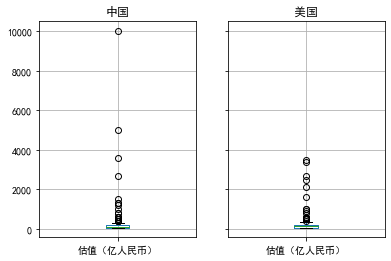

In [56]:
# 绘制boxplot，这其中也要运用到分类
%matplotlib inline
import matplotlib as mpl  
mpl.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签  
mpl.rcParams['axes.unicode_minus']=False #用来正常显示负号 

df[df.国家.isin(["中国","美国"])][['国家',"估值（亿人民币）"]].groupby ( by = '国家' ).boxplot()

中国         AxesSubplot(0.1,0.15;0.363636x0.75)
美国    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

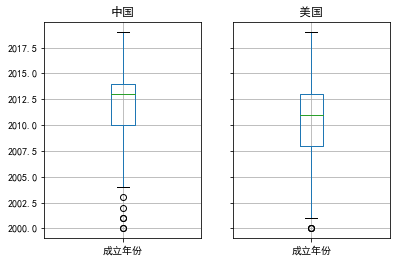

In [57]:
df[df.国家.isin(["中国","美国"])][['国家',"成立年份"]].groupby ( by = '国家' ).boxplot()

*** 如何实现2.1中的组合出击出报表呢？  ***

* Pandas实现groupby分组统计

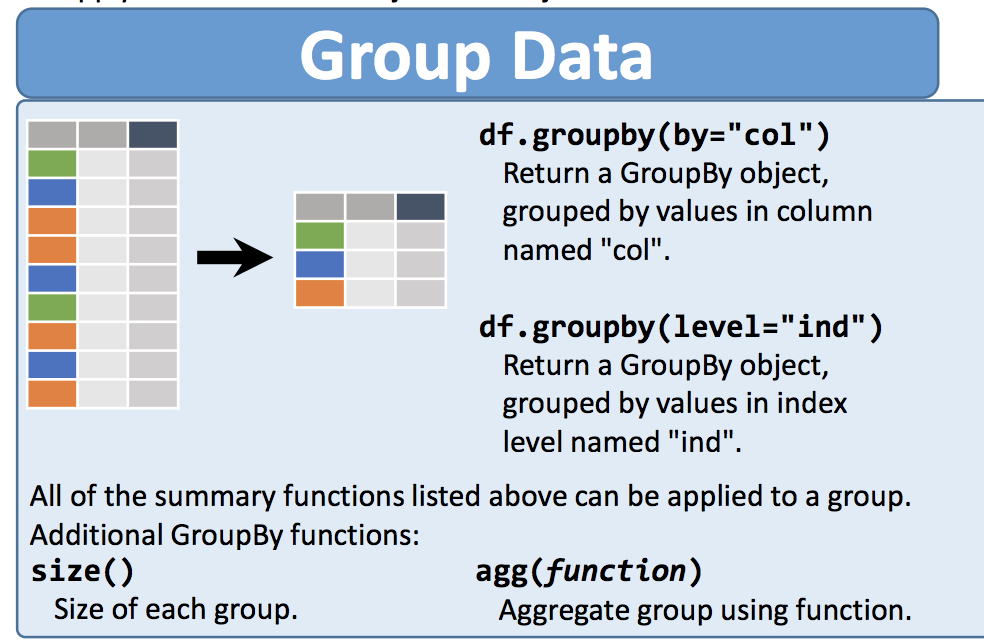

* 本小结内容：
    * 单个groupby，查询所有数据列的统计
    * 多个列groupby,查询所有数据列的统计
    * 同时查看多种数据
    * 筛选查看单个列或者所需列的数据统计
    * 不同列使用不同函数并定义列名
    

#  数据之间就是要看到差异